Files already downloaded and verified
Files already downloaded and verified
Using device: cuda

MNIST CNN Parameters: 421642
MNIST CKN Parameters: 421642

Fashion-MNIST CNN Parameters: 421642
Fashion-MNIST CKN Parameters: 421642

CIFAR-10 CNN Parameters: 545098
CIFAR-10 CKN Parameters: 545098

=== Training on MNIST ===

Training CNN on MNIST...
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.324479	Accuracy: 4.69%	Time: 0.00s
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.141358	Accuracy: 95.31%	Time: 0.00s
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.171030	Accuracy: 93.75%	Time: 0.00s
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.080646	Accuracy: 96.88%	Time: 0.00s
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.034629	Accuracy: 98.44%	Time: 0.00s
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.092632	Accuracy: 98.44%	Time: 0.00s
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.177124	Accuracy: 95.31%	Time: 0.00s
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.056498	Accuracy: 98.44%	Time: 0.00s
Train Epoch: 1 [51200/60000 

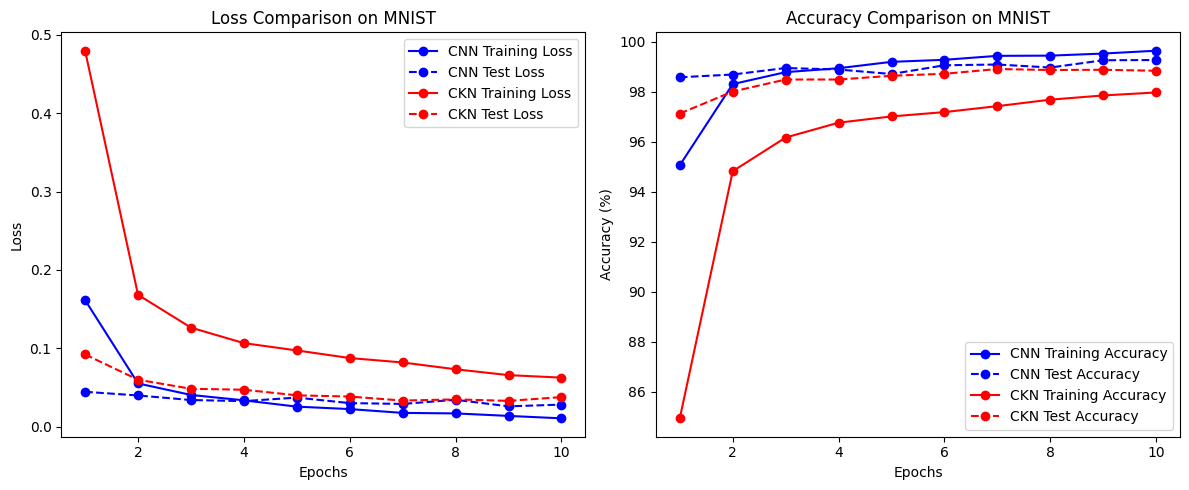

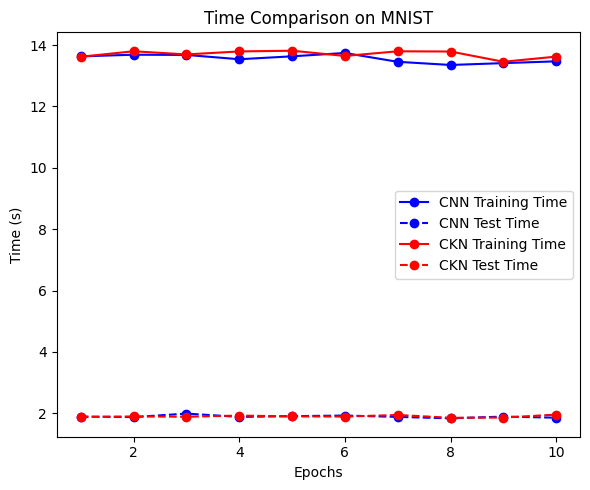

=== Plotting Comparison for Fashion-MNIST ===



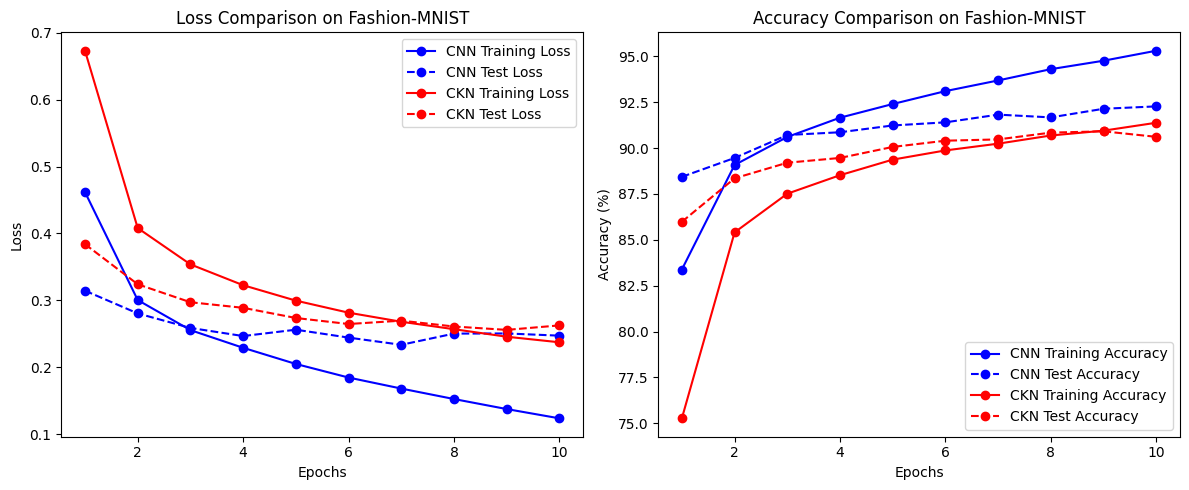

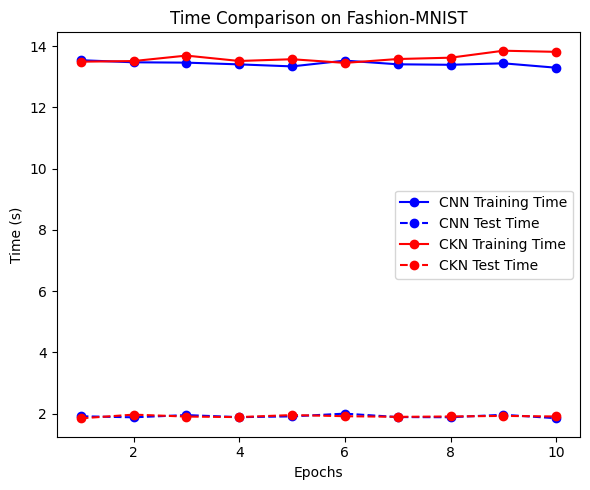

=== Plotting Comparison for CIFAR-10 ===



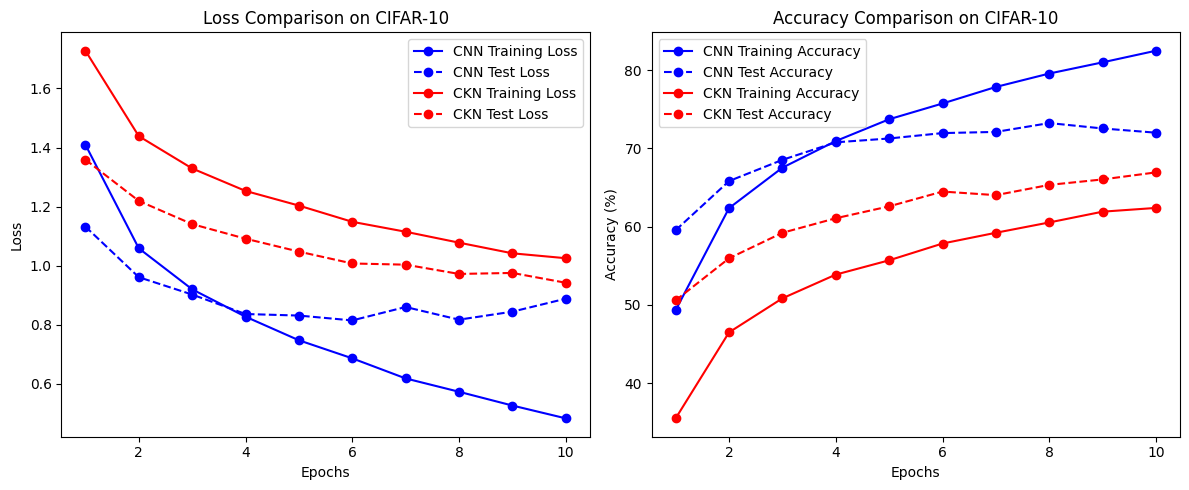

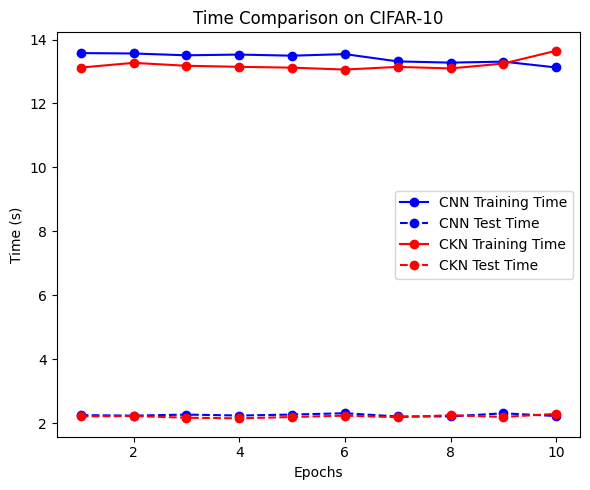

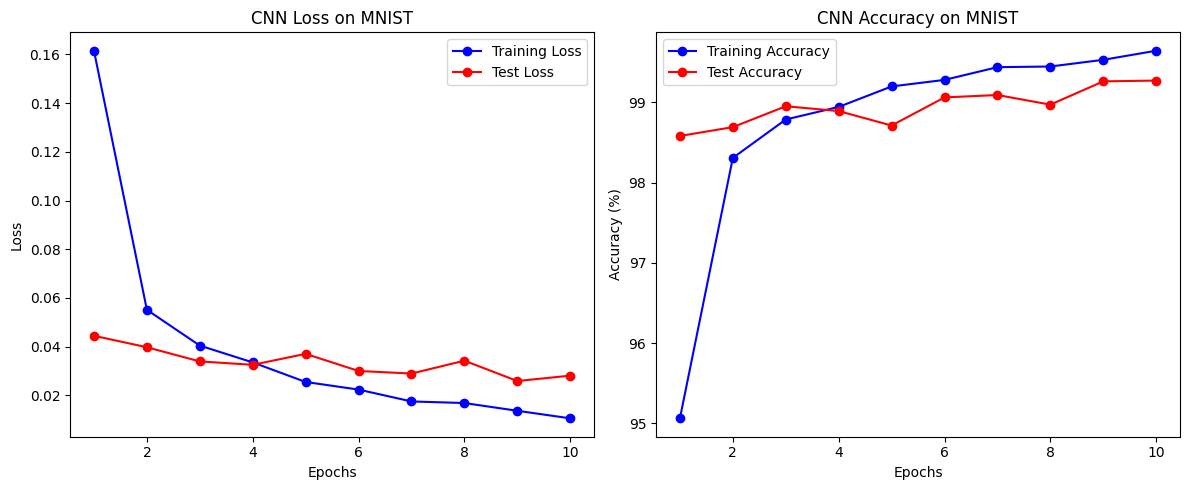

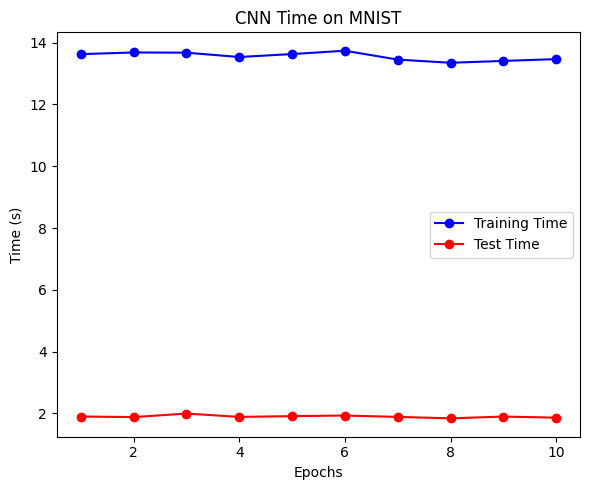

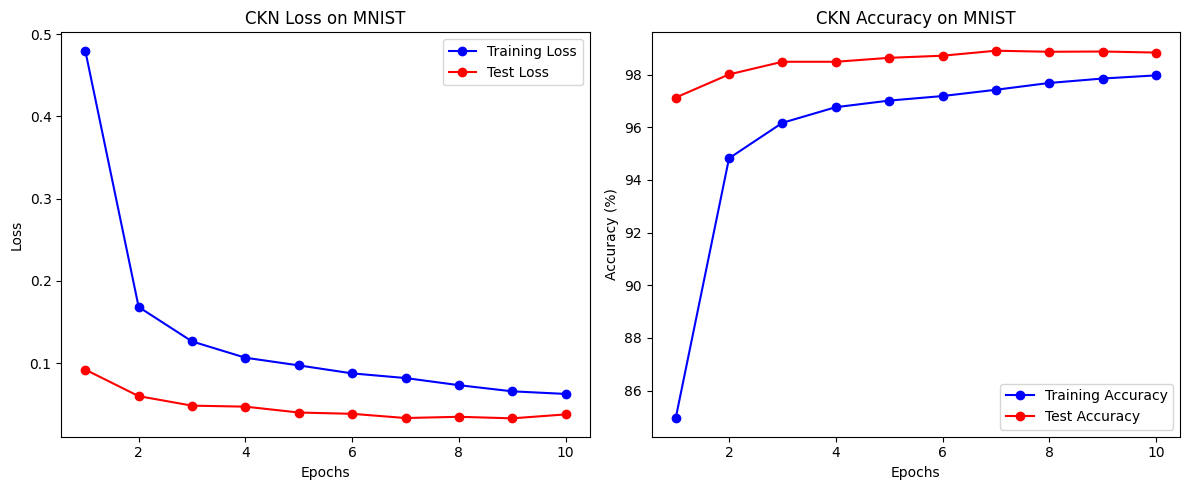

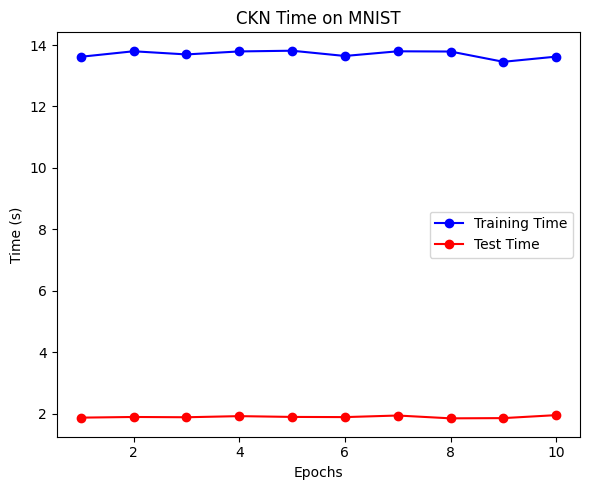

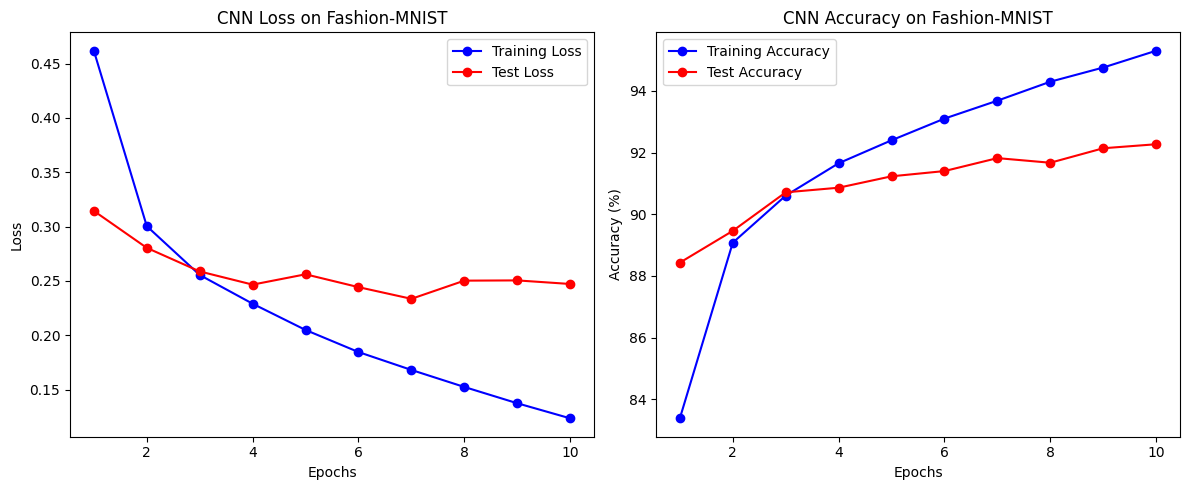

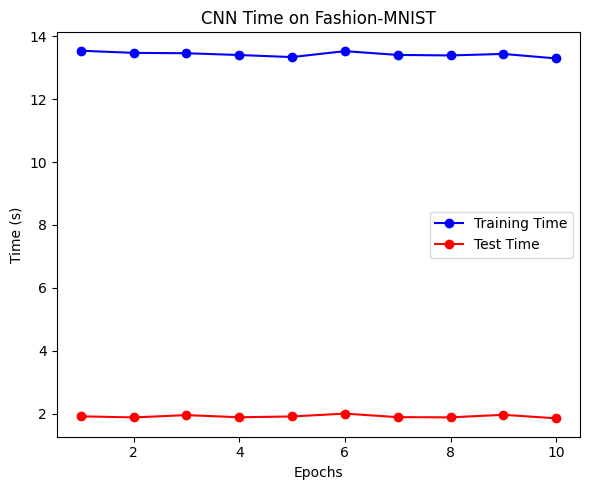

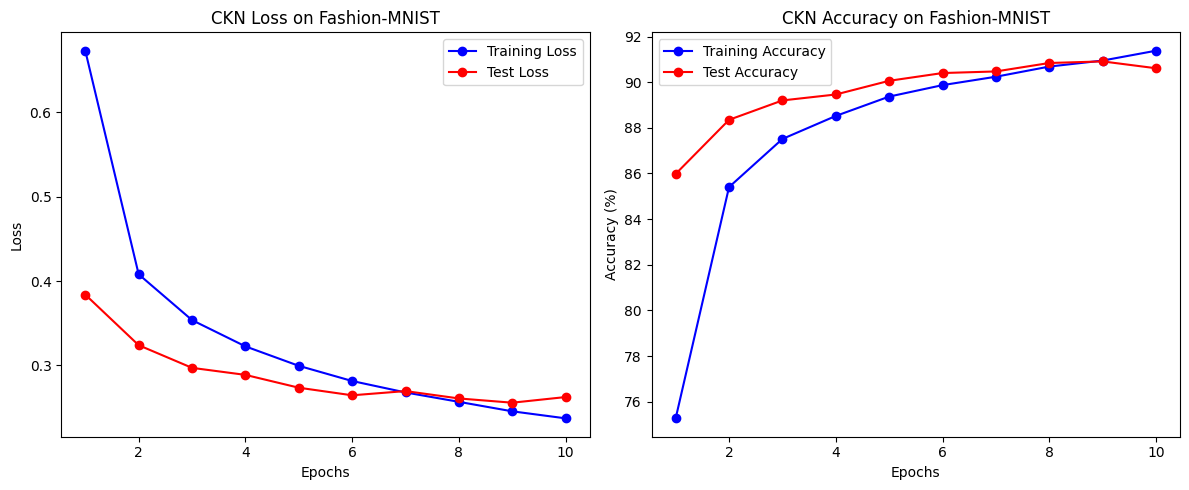

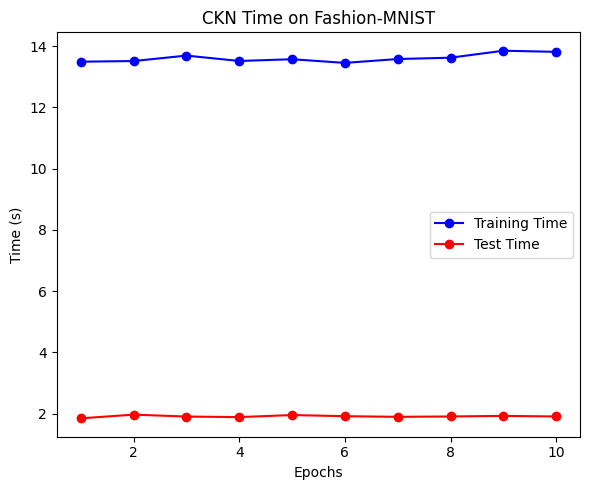

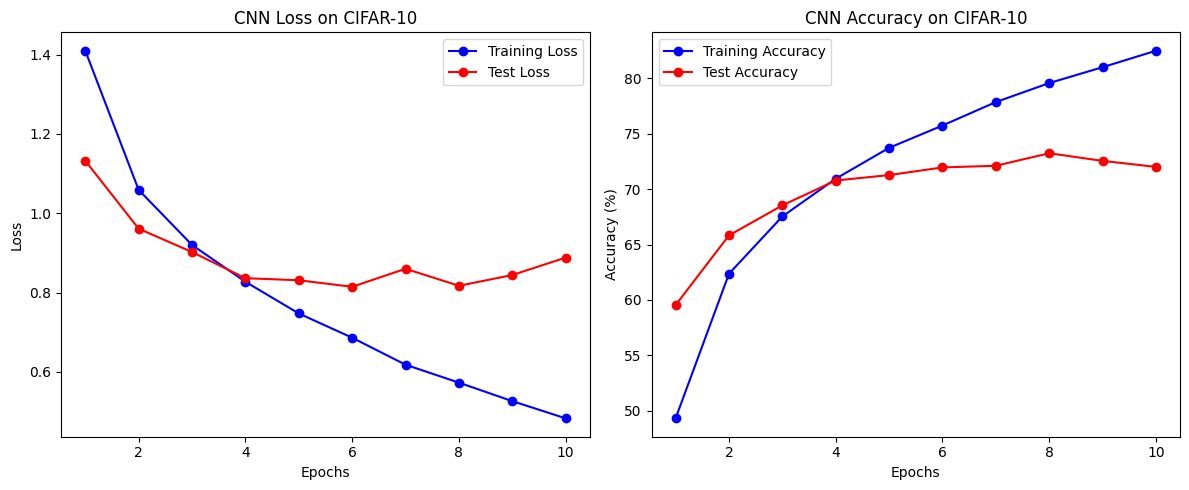

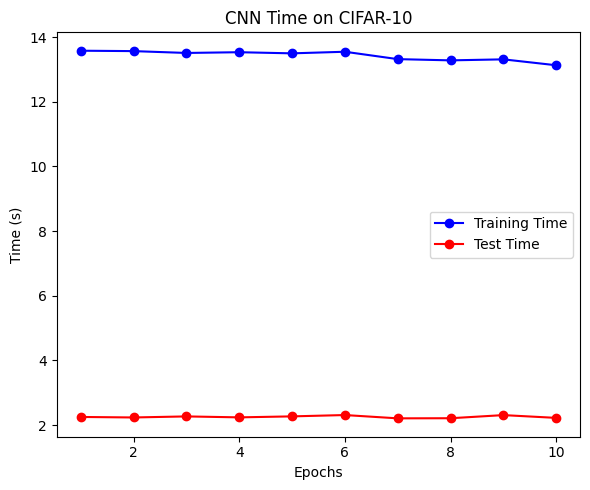

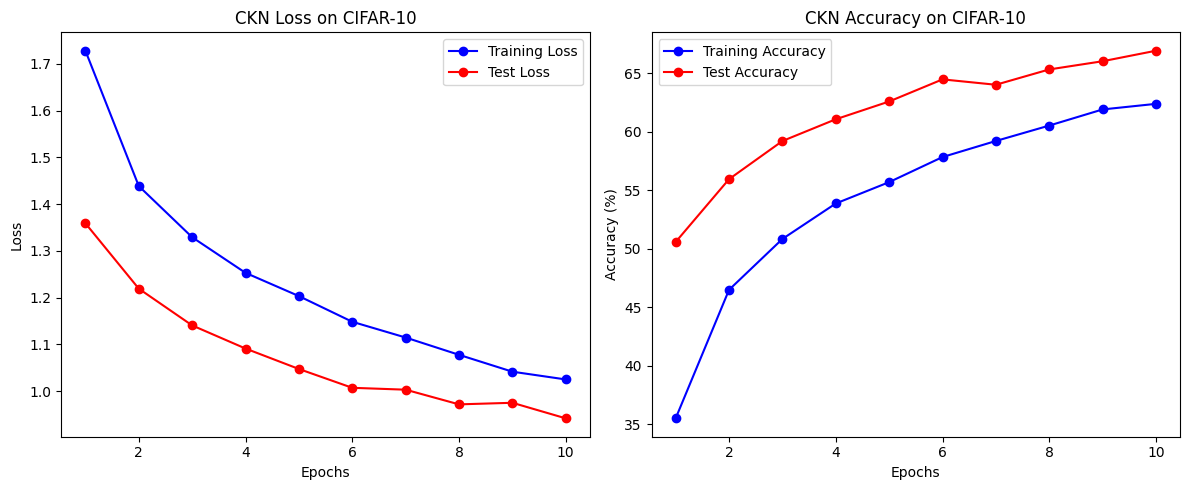

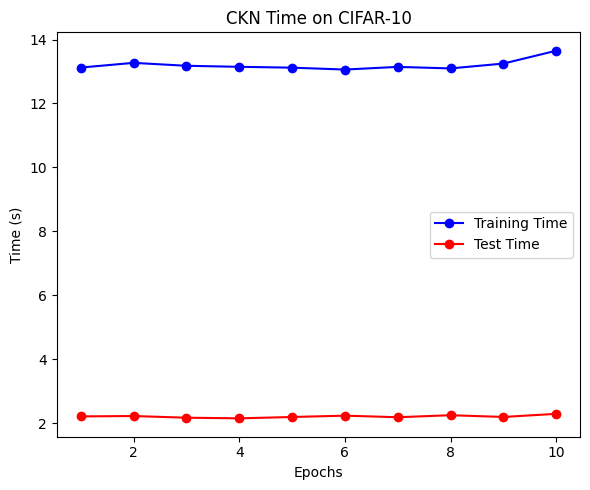

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

# Define the RBF Activation Function
class RBFActivation(nn.Module):
    def __init__(self, gamma=1.0):
        super(RBFActivation, self).__init__()
        self.gamma = gamma

    def forward(self, x):
        return torch.exp(-self.gamma * x ** 2)

# Define the Simple CNN Model for MNIST
class SimpleCNN_MNIST(nn.Module):
    def __init__(self):
        super(SimpleCNN_MNIST, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Input channels=1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(7*7*64, 128)
        self.fc2 = nn.Linear(128, 10)
        # Pooling and Dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)  # 28x28 -> 14x14
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)  # 14x14 -> 7x7
        # Flatten
        x = x.view(-1, 7*7*64)
        # Fully connected layers with ReLU and dropout
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the Simple CKN Model for MNIST
class SimpleCKN_MNIST(nn.Module):
    def __init__(self, gamma=1.0):
        super(SimpleCKN_MNIST, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Kernel-based activation
        self.kernel_activation = RBFActivation(gamma=gamma)
        # Fully connected layers
        self.fc1 = nn.Linear(7*7*64, 128)
        self.fc2 = nn.Linear(128, 10)
        # Pooling and Dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)  # 28x28 -> 14x14
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)  # 14x14 -> 7x7
        # Apply Kernel-Based Activation
        x = self.kernel_activation(x)
        # Flatten
        x = x.view(-1, 7*7*64)
        # Fully connected layers with ReLU and dropout
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the Simple CNN Model for Fashion-MNIST
class SimpleCNN_Fashion(nn.Module):
    def __init__(self):
        super(SimpleCNN_Fashion, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Input channels=1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(7*7*64, 128)
        self.fc2 = nn.Linear(128, 10)
        # Pooling and Dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)  # 28x28 -> 14x14
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)  # 14x14 -> 7x7
        # Flatten
        x = x.view(-1, 7*7*64)
        # Fully connected layers with ReLU and dropout
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the Simple CKN Model for Fashion-MNIST
class SimpleCKN_Fashion(nn.Module):
    def __init__(self, gamma=1.0):
        super(SimpleCKN_Fashion, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Kernel-based activation
        self.kernel_activation = RBFActivation(gamma=gamma)
        # Fully connected layers
        self.fc1 = nn.Linear(7*7*64, 128)
        self.fc2 = nn.Linear(128, 10)
        # Pooling and Dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)  # 28x28 -> 14x14
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)  # 14x14 -> 7x7
        # Apply Kernel-Based Activation
        x = self.kernel_activation(x)
        # Flatten
        x = x.view(-1, 7*7*64)
        # Fully connected layers with ReLU and dropout
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the Simple CNN Model for CIFAR-10
class SimpleCNN_CIFAR(nn.Module):
    def __init__(self):
        super(SimpleCNN_CIFAR, self).__init__()
        # Adjusted first convolutional layer for 3 input channels
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Input channels=3
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(8*8*64, 128)  # Adjusted for 32x32 input
        self.fc2 = nn.Linear(128, 10)
        # Pooling and Dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)  # 32x32 -> 16x16
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)  # 16x16 -> 8x8
        # Flatten
        x = x.view(-1, 8*8*64)
        # Fully connected layers with ReLU and dropout
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the Simple CKN Model for CIFAR-10
class SimpleCKN_CIFAR(nn.Module):
    def __init__(self, gamma=1.0):
        super(SimpleCKN_CIFAR, self).__init__()
        # Adjusted first convolutional layer for 3 input channels
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Kernel-based activation
        self.kernel_activation = RBFActivation(gamma=gamma)
        # Fully connected layers
        self.fc1 = nn.Linear(8*8*64, 128)
        self.fc2 = nn.Linear(128, 10)
        # Pooling and Dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)  # 32x32 -> 16x16
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)  # 16x16 -> 8x8
        # Apply Kernel-Based Activation
        x = self.kernel_activation(x)
        # Flatten
        x = x.view(-1, 8*8*64)
        # Fully connected layers with ReLU and dropout
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# Define transformations for MNIST
transform_mnist = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and std for MNIST
])

# Define transformations for Fashion-MNIST
transform_fashion = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))  # Mean and std for Fashion-MNIST
])

# Define transformations for CIFAR-10
transform_cifar = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),  # Mean for CIFAR-10
                         (0.2470, 0.2435, 0.2616))  # Std for CIFAR-10
])


# Load MNIST Dataset
mnist_train = datasets.MNIST(root='data', train=True, download=True, transform=transform_mnist)
mnist_test  = datasets.MNIST(root='data', train=False, download=True, transform=transform_mnist)

# Load Fashion-MNIST Dataset
fashion_train = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform_fashion)
fashion_test  = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform_fashion)

# Load CIFAR-10 Dataset
cifar_train = datasets.CIFAR10(root='data', train=True, download=True, transform=transform_cifar)
cifar_test  = datasets.CIFAR10(root='data', train=False, download=True, transform=transform_cifar)


# Create Data Loaders for MNIST
mnist_train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
mnist_test_loader  = DataLoader(mnist_test, batch_size=64, shuffle=False)

# Create Data Loaders for Fashion-MNIST
fashion_train_loader = DataLoader(fashion_train, batch_size=64, shuffle=True)
fashion_test_loader  = DataLoader(fashion_test, batch_size=64, shuffle=False)

# Create Data Loaders for CIFAR-10
cifar_train_loader = DataLoader(cifar_train, batch_size=64, shuffle=True)
cifar_test_loader  = DataLoader(cifar_test, batch_size=64, shuffle=False)


# Function to Count Model Parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Generating Confusion Matrix and Classification Report
def generate_confusion_matrix(all_preds, all_targets, classes, dataset_name="Test"):
    cm = confusion_matrix(all_targets, all_preds)
    print(f'Confusion Matrix for {dataset_name}:\n{cm}\n')
    print(f'Classification Report for {dataset_name}:\n{classification_report(all_targets, all_preds, target_names=classes)}\n')
    return cm


def train(model, device, train_loader, optimizer, epoch, log_interval=100):
    model.train()
    epoch_start_time = time.time()
    total_loss = 0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        batch_start_time = time.time()
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        # Accumulate metrics
        total_loss += loss.item() * data.size(0)
        preds = output.argmax(dim=1)
        correct += preds.eq(target).sum().item()
        total += target.size(0)

        if batch_idx % log_interval == 0:
            batch_time = time.time() - batch_start_time
            current_loss = loss.item()
            current_acc = preds.eq(target).sum().item() / target.size(0) * 100
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}'
                  f' ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {current_loss:.6f}\t'
                  f'Accuracy: {current_acc:.2f}%\tTime: {batch_time:.2f}s')
    epoch_time = time.time() - epoch_start_time
    avg_loss = total_loss / total
    avg_acc = correct / total * 100
    print(f'Epoch {epoch} Training Time: {epoch_time:.2f}s\tAverage Loss: {avg_loss:.6f}\tAverage Accuracy: {avg_acc:.2f}%\n')
    return avg_loss, avg_acc, epoch_time


def test(model, device, test_loader, classes, dataset_name="Test"):
    model.eval()
    test_start_time = time.time()
    test_loss = 0
    correct = 0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target, reduction='sum').item()  # Sum up batch loss
            test_loss += loss
            preds = output.argmax(dim=1)
            correct += preds.eq(target).sum().item()
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    test_time = time.time() - test_start_time
    test_loss /= len(test_loader.dataset)
    accuracy = accuracy_score(all_targets, all_preds) * 100

    print(f'\n{dataset_name} set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)}'
          f' ({accuracy:.2f}%)\tTime: {test_time:.2f}s\n')

    # Generate Confusion Matrix and Classification Report
    cm = generate_confusion_matrix(all_preds, all_targets, classes, dataset_name=dataset_name)
    return test_loss, accuracy, cm, test_time


# Plotting Loss and Accuracy
def plot_metrics(metrics, dataset, model_type):
    epochs = range(1, len(metrics[dataset][model_type]['train_loss']) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, metrics[dataset][model_type]['train_loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, metrics[dataset][model_type]['test_loss'], 'ro-', label='Test Loss')
    plt.title(f'{model_type} Loss on {dataset}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics[dataset][model_type]['train_acc'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, metrics[dataset][model_type]['test_acc'], 'ro-', label='Test Accuracy')
    plt.title(f'{model_type} Accuracy on {dataset}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plotting Training and Test Time
def plot_time(metrics, dataset, model_type):
    epochs = range(1, len(metrics[dataset][model_type]['train_time']) + 1)

    plt.figure(figsize=(6, 5))
    plt.plot(epochs, metrics[dataset][model_type]['train_time'], 'bo-', label='Training Time')
    plt.plot(epochs, metrics[dataset][model_type]['test_time'], 'ro-', label='Test Time')
    plt.title(f'{model_type} Time on {dataset}')
    plt.xlabel('Epochs')
    plt.ylabel('Time (s)')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plotting Confusion Matrix
def plot_confusion_matrix(cm, classes, dataset_name="Test"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {dataset_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


# -----------------------------
# Added: Comparison Plotting Functions
# -----------------------------
def plot_comparison_metrics(metrics, dataset):
    epochs = range(1, len(metrics[dataset]['CNN']['train_loss']) + 1)

    # Plot Loss Comparison
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, metrics[dataset]['CNN']['train_loss'], 'b-o', label='CNN Training Loss')
    plt.plot(epochs, metrics[dataset]['CNN']['test_loss'], 'b--o', label='CNN Test Loss')
    plt.plot(epochs, metrics[dataset]['CKN']['train_loss'], 'r-o', label='CKN Training Loss')
    plt.plot(epochs, metrics[dataset]['CKN']['test_loss'], 'r--o', label='CKN Test Loss')
    plt.title(f'Loss Comparison on {dataset}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy Comparison
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics[dataset]['CNN']['train_acc'], 'b-o', label='CNN Training Accuracy')
    plt.plot(epochs, metrics[dataset]['CNN']['test_acc'], 'b--o', label='CNN Test Accuracy')
    plt.plot(epochs, metrics[dataset]['CKN']['train_acc'], 'r-o', label='CKN Training Accuracy')
    plt.plot(epochs, metrics[dataset]['CKN']['test_acc'], 'r--o', label='CKN Test Accuracy')
    plt.title(f'Accuracy Comparison on {dataset}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_comparison_time(metrics, dataset):
    epochs = range(1, len(metrics[dataset]['CNN']['train_time']) + 1)

    plt.figure(figsize=(6, 5))
    plt.plot(epochs, metrics[dataset]['CNN']['train_time'], 'b-o', label='CNN Training Time')
    plt.plot(epochs, metrics[dataset]['CNN']['test_time'], 'b--o', label='CNN Test Time')
    plt.plot(epochs, metrics[dataset]['CKN']['train_time'], 'r-o', label='CKN Training Time')
    plt.plot(epochs, metrics[dataset]['CKN']['test_time'], 'r--o', label='CKN Test Time')
    plt.title(f'Time Comparison on {dataset}')
    plt.xlabel('Epochs')
    plt.ylabel('Time (s)')
    plt.legend()

    plt.tight_layout()
    plt.show()
# -----------------------------
# End of Added: Comparison Plotting Functions
# -----------------------------


# Initialize dictionaries to store metrics
metrics = {
    'MNIST': {
        'CNN': {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': [], 'train_time': [], 'test_time': []},
        'CKN': {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': [], 'train_time': [], 'test_time': []}
    },
    'Fashion-MNIST': {
        'CNN': {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': [], 'train_time': [], 'test_time': []},
        'CKN': {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': [], 'train_time': [], 'test_time': []}
    },
    'CIFAR-10': {
        'CNN': {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': [], 'train_time': [], 'test_time': []},
        'CKN': {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': [], 'train_time': [], 'test_time': []}
    },
}

if __name__ == "__main__":
    # Define classes for each dataset
    mnist_classes = [str(i) for i in range(10)]
    fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck']

    # Check for GPU availability
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f'Using device: {device}\n')

    # Initialize models for MNIST
    cnn_mnist = SimpleCNN_MNIST().to(device)
    ckn_mnist = SimpleCKN_MNIST(gamma=0.5).to(device)

    # Initialize models for Fashion-MNIST
    cnn_fashion = SimpleCNN_Fashion().to(device)
    ckn_fashion = SimpleCKN_Fashion(gamma=0.5).to(device)

    # Initialize models for CIFAR-10
    cnn_cifar = SimpleCNN_CIFAR().to(device)
    ckn_cifar = SimpleCKN_CIFAR(gamma=0.5).to(device)

    # Print number of parameters
    print(f'MNIST CNN Parameters: {count_parameters(cnn_mnist)}')
    print(f'MNIST CKN Parameters: {count_parameters(ckn_mnist)}\n')
    print(f'Fashion-MNIST CNN Parameters: {count_parameters(cnn_fashion)}')
    print(f'Fashion-MNIST CKN Parameters: {count_parameters(ckn_fashion)}\n')
    print(f'CIFAR-10 CNN Parameters: {count_parameters(cnn_cifar)}')
    print(f'CIFAR-10 CKN Parameters: {count_parameters(ckn_cifar)}\n')

    # Define optimizers for each model
    optimizer_cnn_mnist = optim.Adam(cnn_mnist.parameters(), lr=0.001)
    optimizer_ckn_mnist = optim.Adam(ckn_mnist.parameters(), lr=0.001)

    optimizer_cnn_fashion = optim.Adam(cnn_fashion.parameters(), lr=0.001)
    optimizer_ckn_fashion = optim.Adam(ckn_fashion.parameters(), lr=0.001)

    optimizer_cnn_cifar = optim.Adam(cnn_cifar.parameters(), lr=0.001)
    optimizer_ckn_cifar = optim.Adam(ckn_cifar.parameters(), lr=0.001)

    # Training parameters
    epochs = 10  # Adjust as needed

    # ------------------------------
    # Training and Testing on MNIST
    # ------------------------------

    print("=== Training on MNIST ===\n")

    # Train CNN on MNIST
    print("Training CNN on MNIST...")
    for epoch in range(1, epochs + 1):
        train_loss, train_acc, train_time = train(cnn_mnist, device, mnist_train_loader, optimizer_cnn_mnist, epoch)
        test_loss, test_acc, cm, test_time = test(cnn_mnist, device, mnist_test_loader, mnist_classes, dataset_name="MNIST Test")

        # Store metrics
        metrics['MNIST']['CNN']['train_loss'].append(train_loss)
        metrics['MNIST']['CNN']['test_loss'].append(test_loss)
        metrics['MNIST']['CNN']['train_acc'].append(train_acc)
        metrics['MNIST']['CNN']['test_acc'].append(test_acc)
        metrics['MNIST']['CNN']['train_time'].append(train_time)
        metrics['MNIST']['CNN']['test_time'].append(test_time)

    # Train CKN on MNIST
    print("Training CKN on MNIST...")
    for epoch in range(1, epochs + 1):
        train_loss, train_acc, train_time = train(ckn_mnist, device, mnist_train_loader, optimizer_ckn_mnist, epoch)
        test_loss, test_acc, cm, test_time = test(ckn_mnist, device, mnist_test_loader, mnist_classes, dataset_name="MNIST Test")

        # Store metrics
        metrics['MNIST']['CKN']['train_loss'].append(train_loss)
        metrics['MNIST']['CKN']['test_loss'].append(test_loss)
        metrics['MNIST']['CKN']['train_acc'].append(train_acc)
        metrics['MNIST']['CKN']['test_acc'].append(test_acc)
        metrics['MNIST']['CKN']['train_time'].append(train_time)
        metrics['MNIST']['CKN']['test_time'].append(test_time)

    # ------------------------------
    # Training and Testing on Fashion-MNIST
    # ------------------------------

    print("=== Training on Fashion-MNIST ===\n")

    # Train CNN on Fashion-MNIST
    print("Training CNN on Fashion-MNIST...")
    for epoch in range(1, epochs + 1):
        train_loss, train_acc, train_time = train(cnn_fashion, device, fashion_train_loader, optimizer_cnn_fashion, epoch)
        test_loss, test_acc, cm, test_time = test(cnn_fashion, device, fashion_test_loader, fashion_classes, dataset_name="Fashion-MNIST Test")

        # Store metrics
        metrics['Fashion-MNIST']['CNN']['train_loss'].append(train_loss)
        metrics['Fashion-MNIST']['CNN']['test_loss'].append(test_loss)
        metrics['Fashion-MNIST']['CNN']['train_acc'].append(train_acc)
        metrics['Fashion-MNIST']['CNN']['test_acc'].append(test_acc)
        metrics['Fashion-MNIST']['CNN']['train_time'].append(train_time)
        metrics['Fashion-MNIST']['CNN']['test_time'].append(test_time)

    # Train CKN on Fashion-MNIST
    print("Training CKN on Fashion-MNIST...")
    for epoch in range(1, epochs + 1):
        train_loss, train_acc, train_time = train(ckn_fashion, device, fashion_train_loader, optimizer_ckn_fashion, epoch)
        test_loss, test_acc, cm, test_time = test(ckn_fashion, device, fashion_test_loader, fashion_classes, dataset_name="Fashion-MNIST Test")

        # Store metrics
        metrics['Fashion-MNIST']['CKN']['train_loss'].append(train_loss)
        metrics['Fashion-MNIST']['CKN']['test_loss'].append(test_loss)
        metrics['Fashion-MNIST']['CKN']['train_acc'].append(train_acc)
        metrics['Fashion-MNIST']['CKN']['test_acc'].append(test_acc)
        metrics['Fashion-MNIST']['CKN']['train_time'].append(train_time)
        metrics['Fashion-MNIST']['CKN']['test_time'].append(test_time)

    # ------------------------------
    # Training and Testing on CIFAR-10
    # ------------------------------

    print("=== Training on CIFAR-10 ===\n")

    # Train CNN on CIFAR-10
    print("Training CNN on CIFAR-10...")
    for epoch in range(1, epochs + 1):
        train_loss, train_acc, train_time = train(cnn_cifar, device, cifar_train_loader, optimizer_cnn_cifar, epoch)
        test_loss, test_acc, cm, test_time = test(cnn_cifar, device, cifar_test_loader, cifar_classes, dataset_name="CIFAR-10 Test")

        # Store metrics
        metrics['CIFAR-10']['CNN']['train_loss'].append(train_loss)
        metrics['CIFAR-10']['CNN']['test_loss'].append(test_loss)
        metrics['CIFAR-10']['CNN']['train_acc'].append(train_acc)
        metrics['CIFAR-10']['CNN']['test_acc'].append(test_acc)
        metrics['CIFAR-10']['CNN']['train_time'].append(train_time)
        metrics['CIFAR-10']['CNN']['test_time'].append(test_time)

    # Train CKN on CIFAR-10
    print("Training CKN on CIFAR-10...")
    for epoch in range(1, epochs + 1):
        train_loss, train_acc, train_time = train(ckn_cifar, device, cifar_train_loader, optimizer_ckn_cifar, epoch)
        test_loss, test_acc, cm, test_time = test(ckn_cifar, device, cifar_test_loader, cifar_classes, dataset_name="CIFAR-10 Test")

        # Store metrics
        metrics['CIFAR-10']['CKN']['train_loss'].append(train_loss)
        metrics['CIFAR-10']['CKN']['test_loss'].append(test_loss)
        metrics['CIFAR-10']['CKN']['train_acc'].append(train_acc)
        metrics['CIFAR-10']['CKN']['test_acc'].append(test_acc)
        metrics['CIFAR-10']['CKN']['train_time'].append(train_time)
        metrics['CIFAR-10']['CKN']['test_time'].append(test_time)


    # ------------------------------
    # Plotting Metrics
    # ------------------------------

    # Function to Plot Metrics
    def plot_metrics(metrics, dataset, model_type):
        epochs = range(1, len(metrics[dataset][model_type]['train_loss']) + 1)

        # Plot Loss
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, metrics[dataset][model_type]['train_loss'], 'bo-', label='Training Loss')
        plt.plot(epochs, metrics[dataset][model_type]['test_loss'], 'ro-', label='Test Loss')
        plt.title(f'{model_type} Loss on {dataset}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, metrics[dataset][model_type]['train_acc'], 'bo-', label='Training Accuracy')
        plt.plot(epochs, metrics[dataset][model_type]['test_acc'], 'ro-', label='Test Accuracy')
        plt.title(f'{model_type} Accuracy on {dataset}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Function to Plot Training and Test Time
    def plot_time(metrics, dataset, model_type):
        epochs = range(1, len(metrics[dataset][model_type]['train_time']) + 1)

        plt.figure(figsize=(6, 5))
        plt.plot(epochs, metrics[dataset][model_type]['train_time'], 'bo-', label='Training Time')
        plt.plot(epochs, metrics[dataset][model_type]['test_time'], 'ro-', label='Test Time')
        plt.title(f'{model_type} Time on {dataset}')
        plt.xlabel('Epochs')
        plt.ylabel('Time (s)')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Function to Plot Confusion Matrix
    def plot_confusion_matrix(cm, classes, dataset_name="Test"):
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
        plt.title(f'Confusion Matrix for {dataset_name}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


    # ------------------------------
    # Added: Comparison Plotting
    # ------------------------------

    # Function to Plot Comparison Metrics between CNN and CKN
    def plot_comparison_metrics(metrics, dataset):
        epochs = range(1, len(metrics[dataset]['CNN']['train_loss']) + 1)

        # Plot Loss Comparison
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, metrics[dataset]['CNN']['train_loss'], 'b-o', label='CNN Training Loss')
        plt.plot(epochs, metrics[dataset]['CNN']['test_loss'], 'b--o', label='CNN Test Loss')
        plt.plot(epochs, metrics[dataset]['CKN']['train_loss'], 'r-o', label='CKN Training Loss')
        plt.plot(epochs, metrics[dataset]['CKN']['test_loss'], 'r--o', label='CKN Test Loss')
        plt.title(f'Loss Comparison on {dataset}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot Accuracy Comparison
        plt.subplot(1, 2, 2)
        plt.plot(epochs, metrics[dataset]['CNN']['train_acc'], 'b-o', label='CNN Training Accuracy')
        plt.plot(epochs, metrics[dataset]['CNN']['test_acc'], 'b--o', label='CNN Test Accuracy')
        plt.plot(epochs, metrics[dataset]['CKN']['train_acc'], 'r-o', label='CKN Training Accuracy')
        plt.plot(epochs, metrics[dataset]['CKN']['test_acc'], 'r--o', label='CKN Test Accuracy')
        plt.title(f'Accuracy Comparison on {dataset}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Function to Plot Comparison Time between CNN and CKN
    def plot_comparison_time(metrics, dataset):
        epochs = range(1, len(metrics[dataset]['CNN']['train_time']) + 1)

        plt.figure(figsize=(6, 5))
        plt.plot(epochs, metrics[dataset]['CNN']['train_time'], 'b-o', label='CNN Training Time')
        plt.plot(epochs, metrics[dataset]['CNN']['test_time'], 'b--o', label='CNN Test Time')
        plt.plot(epochs, metrics[dataset]['CKN']['train_time'], 'r-o', label='CKN Training Time')
        plt.plot(epochs, metrics[dataset]['CKN']['test_time'], 'r--o', label='CKN Test Time')
        plt.title(f'Time Comparison on {dataset}')
        plt.xlabel('Epochs')
        plt.ylabel('Time (s)')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Generate Comparison Plots for Each Dataset
    for dataset in metrics.keys():
        print(f"=== Plotting Comparison for {dataset} ===\n")
        plot_comparison_metrics(metrics, dataset)
        plot_comparison_time(metrics, dataset)

    plot_metrics(metrics, 'MNIST', 'CNN')
    plot_time(metrics, 'MNIST', 'CNN')

    plot_metrics(metrics, 'MNIST', 'CKN')
    plot_time(metrics, 'MNIST', 'CKN')

    plot_metrics(metrics, 'Fashion-MNIST', 'CNN')
    plot_time(metrics, 'Fashion-MNIST', 'CNN')

    plot_metrics(metrics, 'Fashion-MNIST', 'CKN')
    plot_time(metrics, 'Fashion-MNIST', 'CKN')

    plot_metrics(metrics, 'CIFAR-10', 'CNN')
    plot_time(metrics, 'CIFAR-10', 'CNN')

    plot_metrics(metrics, 'CIFAR-10', 'CKN')
    plot_time(metrics, 'CIFAR-10', 'CKN')
